In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pyik.mplext import ViolinPlot
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import sqlite3

In [51]:
posts_path = "/home/alex/data/stackexchange/overflow/caches/posts.db"
meta_path_2008 = "/home/alex/data/stackexchange/overflow/caches/posts_2008.hdf5"
meta_path_2017 = "/home/alex/data/stackexchange/overflow/caches/posts_2017.hdf5"
word_dict_path = "./dictionaries/words_2008.hdf5"
word_list_path = "./words_observed_100k.hdf5"

In [52]:
conn = sqlite3.connect(posts_path)

In [53]:
store_meta_2008 = pd.HDFStore(meta_path_2008, "r", complib="blosc", complevel=9)
store_meta_2017 = pd.HDFStore(meta_path_2017, "r", complib="blosc", complevel=9)
store_dict = pd.HDFStore(word_dict_path, "r", complib="blosc", complevel=9)
store_words = pd.HDFStore(word_list_path, "r", complib="blosc", complevel=9)

In [36]:
# cols = ["CreationDate", "Id"]
smask = store_meta_2008.select_as_coordinates("posts", "PostTypeId == 1")
# posts = store.select("posts", where=smask, columns=cols)
qs08 = store_meta_2008.select("posts", where=smask)
qs08.set_index("Id", inplace=True, drop=False)

In [37]:
smask = store_meta_2017.select_as_coordinates("posts", "PostTypeId == 1")
qs17 = store_meta_2017.select("posts", where=smask)
qs17.set_index("Id", inplace=True, drop=False)

In [59]:
words = store_dict.select("all")
wordlists = store_words.select("words")

In [62]:
words = words.sort_values(by="n", ascending=False)
words

,n,words
334162,795914,use
544765,335749,"rel=""nofollow"
414588,298193,code
161526,256517,file
124272,250964,work
624868,228567,want
696925,210250,way
691815,192441,good
425603,179579,try
465720,166956,class


In [57]:
print np.sum(qs08.AnswerCount == 0) * 100. / len(qs08)
print np.sum(qs17.AnswerCount == 0) * 100. / len(qs17)
# most of 2008 questions have a reply
print np.sum(qs08.AnswerCount > 1) * 100. / len(qs08)
print np.sum(qs17.AnswerCount > 1) * 100. / len(qs17)

0.110830718865
30.4609389687
88.3099167917
22.6370638235


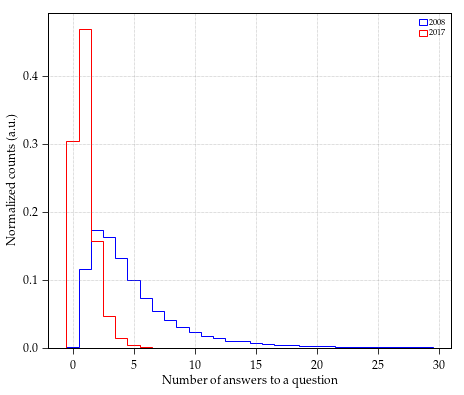

In [55]:
# did the number of answers change with time?
plt.figure(figsize=(8,6))
plt.xlabel(r"Number of answers to a question")
plt.ylabel("Normalized counts (a.u.)")
qs08.AnswerCount.hist(range=[-0.5, 29.5], bins=30, color="b", normed=True, histtype="step", label="2008", axes=plt.gca())
qs17.AnswerCount.hist(range=[-0.5, 29.5], bins=30, color="r", normed=True, histtype="step", label="2017", axes=plt.gca())
plt.legend(loc="best")
plt.savefig("./plots/nanswers_time.pdf")

In [19]:
# pd.to_datetime(posts.CreationDate, origin="julian", unit="D")

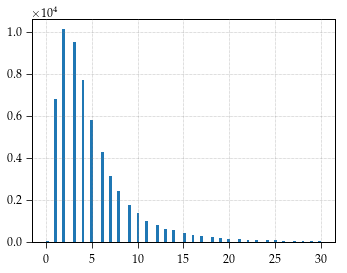

In [21]:
posts.AnswerCount.hist(bins=100, range=[0, 30])